In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *

from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)

Toggle code

> 时间序列（time series）数据是一种重要的结构化数据形式。
有以下几种：
* 时间戳timestamp，特定的时刻
* 固定时期period
* 时间间隔interval
* 实验或过程时间

## 日期和时间数据类型及工具

In [9]:
from datetime import datetime,timedelta
now = datetime.now()
now.year,now.month,now.day

(2018, 6, 7)

#### datetime以毫秒形式存储日期和时间，datetime.timedelta表示两个datetime之间的时间差

In [12]:
delta = datetime(2018,6,7) - datetime(2019,3,1)
delta
timedelta(926,56700)
delta.days
delta.seconds

0

#### 可以给datetime对象加上或减去一个或多个timedelta，这样会产生一个新对象

In [14]:
start = datetime(2018,1,8)
start+timedelta(12)

datetime.datetime(2018, 1, 20, 0, 0)

### 字符串和datetime的转换

#### 利用str或strftime方法，datetime对象可以被格式化为字符串

In [55]:
stamp = datetime(2018,6,7,14,34,23)
str(stamp)
stamp.strftime('%Y-%m-%d-%I:%M:%S %p')
stamp.strftime('%x %X')

'06/07/18 14:34:23'

#### datetime格式定义
* %Y 4位数的年
* %y 2位数的年
* %m 2位数的月
* %d 2位数的日
* %H 24小时制的时
* %I 12小时制的时
* %S 秒
* %w 用整数表示的星期几
* %U 每年的第几周，星期天被认为是每周的第一天
* %a 星期几的简写
* %A 星期几的全称
* %b 月份的简写
* %B 月份的全称
* %c 完整的日期和时间
* %p 不同环境中的AM或PM
* %x 适合于当前环境的日期格式
* %X 适合于当前环境的时间格式

#### datetime.strptime可以将字符串解析成日期格式

In [37]:
value = '2019-01-01'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2019, 1, 1, 0, 0)

#### 还可以使用dateutil这个第三方包中的parser.parse方法，就可以不用传入格式了

In [56]:
# pip install python-dateutil --upgrade
from dateutil.parser import parse
parse('2018-01-03')

datetime.datetime(2018, 1, 3, 0, 0)

## 时间序列基础

In [68]:
from datetime import datetime
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2018,1,1)]
ts = Series(np.random.randn(3),index = dates)
stamp = ts.index[0]
ts['2011']

2011-01-02    0.150747
2011-01-05   -2.182352
dtype: float64

#### 对时间序列进行切片

In [70]:
#传入年或年月即可
ts['2011-01']

2011-01-02    0.150747
2011-01-05   -2.182352
dtype: float64

### 带有重复索引的时间序列

In [73]:
# 通过检查索引的is_unique属性，我们就可以知道它是不是唯一的
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = Series(np.arange(5),index = dates)
dup_ts.index.is_unique

False

## 日期的范围、频率及移动

#### 生成日期范围
    使用pandas的date_range

In [76]:
index = pd.date_range('4/1/2018','6/1/2018')
index

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30', '2018-05-01', '2018-05-02',
               '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26',
      

#### 可以只传入开始或结束日期，再传入periods的数字

In [79]:
pd.date_range(start='4/1/2018',periods=20)
pd.date_range(end='2018/4/1',periods=10)

DatetimeIndex(['2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-03-31', '2018-04-01'],
              dtype='datetime64[ns]', freq='D')

#### 如果想生成一个有固定频率的日期，可以传入freq，比如freq=‘BM’为business end of month

In [81]:
pd.date_range('2018/2/1','2018/9/1',freq='BM')

DatetimeIndex(['2018-02-28', '2018-03-30', '2018-04-30', '2018-05-31',
               '2018-06-29', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', freq='BM')

#### 偏移量可以加上H这样的字段，表示小时递增的频率

In [94]:
pd.date_range('2018/2/1 12:22:22',periods = 5,freq='2h30min')

DatetimeIndex(['2018-02-01 12:22:22', '2018-02-01 14:52:22',
               '2018-02-01 17:22:22', '2018-02-01 19:52:22',
               '2018-02-01 22:22:22'],
              dtype='datetime64[ns]', freq='150T')

#### 时间序列的基础频率
* D Day
* B 工作日
* H 小时
* T 分钟
* S 秒
* M MonthEnd 每月最后一日
* MS MonthBegin 每月第一个日历日
* BMS 每月第一个工作日
* W-MON、W-TUE 从指定的星期几开始算起，每周

#### 频率和日期偏移量

In [95]:
from pandas.tseries.offsets import Hour,Minute
hour = Hour()
four_hour = Hour(4)
four_hour

<4 * Hours>

#### 使用shift进行时间移位操作，单纯的移位操作不会修改索引

In [99]:
ts = Series(np.random.randn(4),index=pd.date_range('2/3/2018',periods=4,freq='M'))
ts

2018-02-28   -0.378841
2018-03-31   -0.796864
2018-04-30   -0.699398
2018-05-31   -0.330025
Freq: M, dtype: float64

In [105]:
ts.shift(2,freq='90T')

2018-02-28 03:00:00   -0.378841
2018-03-31 03:00:00   -0.796864
2018-04-30 03:00:00   -0.699398
2018-05-31 03:00:00   -0.330025
Freq: M, dtype: float64

## 时区处理

#### 使用pytz库

## 时期及其算术运算

#### 构造一个时期period，需要一个字符串或整数，以及频率

In [112]:
p = pd.Period('2009',freq='D')
p

Period('2009-01-01', 'D')

#### period_range 函数用于创建规则的时期范围

In [111]:
rng = pd.period_range('2018/1/1','2018/4/21',freq='M')
rng

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04'], dtype='period[M]', freq='M')

#### period可以通过使用其asfreq方法被转换成别的频率

In [113]:
rng.asfreq("d",how='start')

PeriodIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01'], dtype='period[D]', freq='D')

![title](RTX截图未命名.png)

#### 使用to_period方法，将由时间戳索引的Series和DataFrame转换为以时期索引

In [124]:
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [125]:
rng = pd.date_range('1/2/2001',periods=3,freq='Y')
ts = Series(np.random.randn(3),index=rng)
pts = ts.to_period()
ts
pts

2001-12-31   -0.233577
2002-12-31   -0.602767
2003-12-31    0.507422
Freq: A-DEC, dtype: float64

2001   -0.233577
2002   -0.602767
2003    0.507422
Freq: A-DEC, dtype: float64

In [128]:
# 使用timestamp转换为时间戳
pts.to_timestamp(how='end')

2001-12-31   -0.233577
2002-12-31   -0.602767
2003-12-31    0.507422
Freq: A-DEC, dtype: float64

#### 通过将两个数组以及一个频率传入PeriodIndex，就可以将他们合并成DataFrame的一个索引

In [134]:
data = pd.read_csv('./data/ch08/macrodata.csv')
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
data.index = index
data.head(12)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
1960Q2,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
1960Q3,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
1960Q4,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
1961Q1,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77
1961Q2,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81


## 重采样及频率转换

#### 重采样resampling指的是将时间序列从一个频率转换到另一个频率的处理过程
    将高频率数据聚合到低频率称为**降采样**，反之则为* 升采样 *

#### pandas对象带有一个resample方法
* freq 表示重采样频率的字符串或DateOffset
* mean() 用于产生聚合值的函数名或数组函数，还有np.max,first,last,median,min
* axis = 0 重采样的轴，默认为axis=0
* fill_method=None 升采样时如何插值，比如ffill或bfill，默认不插值
* closed=‘right’在降采样中，各时间段的哪一端是闭合的，right或left，默认为right
* label=‘right’在降采样中，如何设置聚合值的标签，右边界或左边界
* loffset=None 面元标签的时间校正值
* limit=None 在前向或后向填充时，允许填充的最大时期数
* kind=None 聚合到时期或时间戳，默认聚合到时间序列的索引类型
* convention=None 看不懂

In [140]:
rng = pd.date_range('1/2/2000',periods=100,freq='D')
ts = Series(np.random.randn(len(rng)),index=rng)
ts.resample('M',kind='period').mean()

2000-01    0.231301
2000-02    0.071146
2000-03   -0.305462
2000-04    0.184607
Freq: M, dtype: float64

### 降采样
    需要考虑的东西：
    * 各区间哪边是闭合的
    * 如何标记各个聚合面元，用区间的开头还是末尾

In [146]:
rng = pd.date_range('1/1/2000',periods=12,freq='T')
ts = Series(np.arange(12),index=rng)
ts
ts.resample('5min',closed='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

#### 应用于金融领域的OHLC重采样

In [149]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 升采样和插值


#### 升采样默认会引入缺失值，如果想采用填充其他值得方式，可以用fill_method=ffill

In [156]:
frame = DataFrame(np.random.randn(2,4),
                 index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                 columns=['Colorado','Texas','New York','Ohio'])
#frame[:5]
df_daily = frame.resample('D').ffill()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.073542,0.566575,-0.563389,0.189876
2000-01-06,-0.073542,0.566575,-0.563389,0.189876
2000-01-07,-0.073542,0.566575,-0.563389,0.189876
2000-01-08,-0.073542,0.566575,-0.563389,0.189876
2000-01-09,-0.073542,0.566575,-0.563389,0.189876
2000-01-10,-0.073542,0.566575,-0.563389,0.189876
2000-01-11,-0.073542,0.566575,-0.563389,0.189876
2000-01-12,0.414016,-1.006598,0.736613,0.439634


## 时间序列绘图

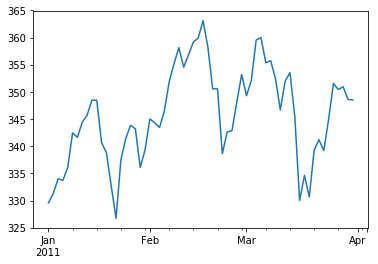

In [164]:
close_px_all = pd.read_csv('./data/ch09/stock_px.csv',parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B').ffill()
#close_px.loc['2009'].plot()
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

## 移动窗口函数

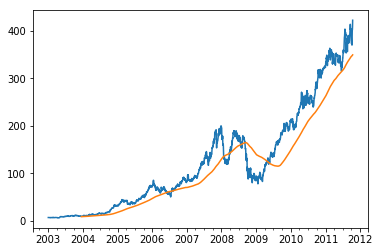

In [168]:
close_px.AAPL.plot()
#pd.rolling_mean(close_px.AAPL,250).plot()
Series.rolling(close_px.AAPL,250).mean().plot()